In [373]:
import os
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import AveragePooling2D, Convolution2D, MaxPooling2D, ZeroPadding2D  
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2
from keras.utils import np_utils

from tempfile import TemporaryFile
import PIL
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [133]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [136]:
type(y_train)

numpy.ndarray

In [35]:
pathToImages = "/Users/bsoper/Dropbox/Senior Year/Fall/Machine Learning/Project/liscencePlateClassification/Characters/"
scaledImageSize = (100,100)

#Organize Data so that it is in numpy arrays for the neural network
def changImageSize(fileName):
    img = PIL.Image.open(fileName) #Opens as a color image
    #img = mpimg.imread(pathToImages+fileName) #Opens as a black and white image
    img = img.convert('L') #Converts color image to greyscale
    img = img.resize(scaledImageSize, PIL.Image.ANTIALIAS)
    return img

In [260]:
imageData = np.expand_dims(np.empty([100,100]), axis=0)
locationData = np.ndarray(shape=(1,5795), dtype=float) #np.empty([1,1]) # 5795
i = 0
for root, dirs, files in os.walk(pathToImages):
    print os.path.basename(root) 
    for fileName in files:
        if fileName == '.DS_Store': continue
        #if i >= 300: break
        img = changImageSize(root + '/' + fileName)
        imageData = np.concatenate((imageData, np.expand_dims(np.asarray(img),axis=0)), axis = 0)
        locationData[0,i] = os.path.basename(root) # = np.concatenate((locationData,np.expand_dims(np.asarray([os.path.basename(root)]), axis = 0)), axis = 0)
        i += 1
        
imageData = imageData[1:]           #These two lines get ride of the garbage that was created in the empty array with np.empty() above
locationData = locationData[0,:]


0
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
4
5
6
7
8
9


In [261]:
imagesArray = TemporaryFile()
np.save(imagesArray, imageData)

classificationArray = TemporaryFile()
np.save(classificationArray, locationData)

In [178]:
np.load(imagesArray)
np.load(imagesArray)

IOError: Failed to interpret file <open file '<fdopen>', mode 'w+b' at 0x111554ae0> as a pickle

In [262]:
#normalize data
imageData = imageData/255

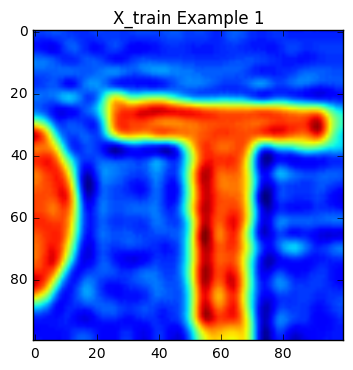

29.0


In [301]:
#Print example data to make sure everything looks good
plt.imshow(imageData[5])
plt.title('X_train Example 1')
plt.show()
print locationData[5]

In [302]:
# shuffle the order samples
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [340]:
# shuffle data
imageData, locationData = shuffle_in_unison(imageData, locationData)

#divide Data into test and train
data = imageData #np.expand_dims(imageData, axis=1)
X_train = data[:5000]
X_test = data[5000:]
y_train = locationData[:5000]
y_test = locationData[5000:]

In [341]:
print locationData
print imageData

[ 29.  21.  29. ...,  23.  10.   8.]
[[[ 0.60784314  0.60784314  0.60392157 ...,  0.57647059  0.57647059
    0.57647059]
  [ 0.60784314  0.60784314  0.60392157 ...,  0.57647059  0.57647059
    0.57647059]
  [ 0.60784314  0.60784314  0.60392157 ...,  0.57647059  0.57647059
    0.57647059]
  ..., 
  [ 0.61568627  0.61176471  0.61176471 ...,  0.56862745  0.56862745
    0.56862745]
  [ 0.61176471  0.60784314  0.60784314 ...,  0.56862745  0.56862745
    0.56862745]
  [ 0.60784314  0.60392157  0.60392157 ...,  0.56470588  0.56470588
    0.56470588]]

 [[ 0.60784314  0.55686275  0.54117647 ...,  1.          1.          1.        ]
  [ 0.60392157  0.55686275  0.54509804 ...,  1.          1.          1.        ]
  [ 0.61568627  0.55294118  0.54901961 ...,  1.          1.          1.        ]
  ..., 
  [ 0.76862745  0.8         0.8        ...,  0.55686275  0.55686275
    0.56862745]
  [ 0.76470588  0.84313725  0.81960784 ...,  0.54509804  0.55294118
    0.55294118]
  [ 0.75294118  0.83921569  0.

('Shape of X_train:', (5000, 100, 100))


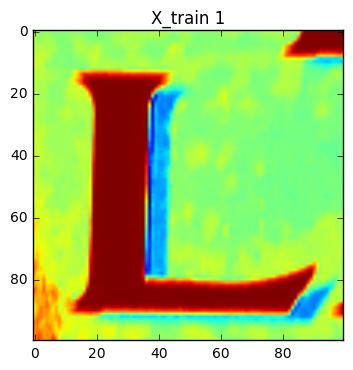

('label:', 21.0)


In [342]:
# show one image from the data
print('Shape of X_train:' ,X_train.shape)

plt.imshow(X_train[1,:,:])
plt.title('X_train 1')
plt.show()
print('label:', y_train[1])

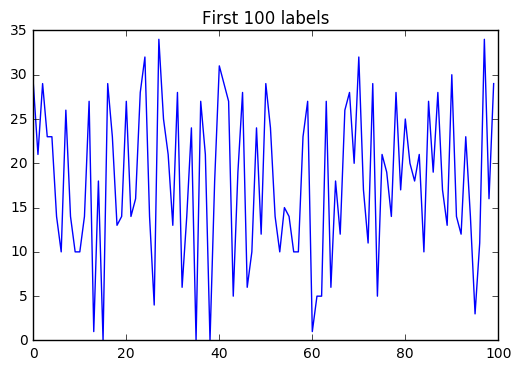

In [343]:
plt.plot(locationData[:100])
plt.title('First 100 labels')
plt.show()

In [344]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]
im_width  = X_train.shape[1]
im_height = X_train.shape[2]

print('# of training samples:', num_train)
print('# of test samples:', num_test)
print('type of data:', type(X_train[1,1,1]))

# change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('type of data:', type(X_train[1,1,1]))

('# of training samples:', 5000)
('# of test samples:', 795)
('type of data:', <type 'numpy.float64'>)
('type of data:', <type 'numpy.float32'>)


In [270]:
# vectorize the images
#X_train = X_train.reshape(num_train, im_width*im_height)
#X_test = X_test.reshape(num_test, im_width*im_height)

In [345]:
# normalize the range
print('maximum of X_train:',np.max(X_train[:]))
#X_train *= 255;
#X_test *= 255;
print('maximum of X_train:',np.max(X_train[:]))

('maximum of X_train:', 1.0)
('maximum of X_train:', 1.0)


In [346]:
# convert class vectors to binary class matrices (one hot representation)
nb_classes = np.unique(y_train).size
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
X_train.shape

(5000, 1, 100, 100)

In [374]:
model = Sequential()
model.add(Convolution2D(64, 10, 10, border_mode='same', input_shape=(1,im_width,im_height)))

model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(128, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, W_regularizer=l2(1e-3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_37 (Convolution2D) (None, 64, 100, 100)  6464        convolution2d_input_17[0][0]     
____________________________________________________________________________________________________
convolution2d_38 (Convolution2D) (None, 32, 100, 100)  18464       convolution2d_37[0][0]           
____________________________________________________________________________________________________
activation_68 (Activation)       (None, 32, 100, 100)  0           convolution2d_38[0][0]           
____________________________________________________________________________________________________
convolution2d_39 (Convolution2D) (None, 32, 98, 98)    9248        activation_68[0][0]              
___________________________________________________________________________________________

In [375]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [377]:
batch_size = 100
nb_epoch = 50
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 5000 samples, validate on 795 samples
Epoch 1/50
 300/5000 [>.............................] - ETA: 481s - loss: 3.4404 - acc: 0.0500

KeyboardInterrupt: 

In [283]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 1.4284826632565673)
('Test accuracy:', 0.63018867962015501)


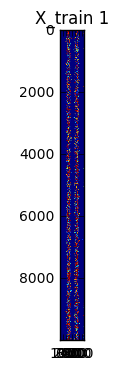

In [16]:
plt.imshow(X_test)
plt.title('X_train 1')
plt.show()

In [290]:
print model.predict(X_train)[1]

[  3.27576786e-01   4.36442788e-05   1.76530797e-04   1.14739954e-03
   1.73645522e-02   3.55599215e-03   4.79418412e-03   1.28684580e-04
   1.32942933e-03   1.76005160e-05   1.19447455e-01   6.38265684e-02
   9.85564291e-03   3.95251364e-02   9.14968608e-04   1.91091513e-05
   1.45065054e-01   5.75342681e-04   8.02832248e-04   1.99790811e-03
   1.96593573e-05   3.75135482e-04   4.44460809e-02   2.01972062e-03
   1.26273304e-01   1.15909657e-04   4.26390171e-02   2.78634429e-02
   2.86739413e-03   1.33478153e-03   9.63236578e-03   7.73643900e-04
   1.65463332e-03   8.54383921e-04   9.50880258e-06   9.56200063e-04]


In [293]:
print X_train.shape

(5000, 10000)


In [287]:
print Y_train[1]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [20]:
print Y_test

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
